In [2]:
import nltk
import numpy as np
import csv
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
stop_words = set(stopwords.words("english"))

In [4]:
data = pd.read_csv('KFCReviews.csv')
print ("Original 'KFCReviews.csv' CSV Data: \n")
data

Original 'KFCReviews.csv' CSV Data: 



,Review,Like,Haha,Angry,Date
0,Absolutely terrible service never get anything...,2,0,0,10 hrs
1,What a terrible store in Layton Utah. Ordered ...,0,0,0,9 hrs
2,I love working at KFC. Great employees and gre...,0,0,0,26 December 2021 at 11:52
3,the kfc in Winchester va on fox drive is the w...,0,0,0,1 January at 16:13
4,Their app is terrible their customer service i...,1,0,0,23 December 2021 at 08:56
5,This is the most trashy KFC I’ve ever visited....,0,0,0,28 December 2021 at 19:36
6,More KFC #reels #Viral #kfc #trending #tiktok,0,0,0,29 December 2021 at 15:38
7,NASTY cold burnt chicken employees cant count ...,1,0,0,24 December 2021 at 08:19
8,Poor service overall ..poor work ethics...poor...,0,0,0,23 December 2021 at 09:42
9,Terrible customer service in Watertown NY. The...,2,0,0,22 December 2021 at 12:36


In [5]:
column_name1 = "Like"
like_sum = data["Like"].sum()
like_sum

42

In [6]:
column_name1 = "Haha"
Haha_sum = data["Haha"].sum()
Haha_sum

1

In [7]:
column_name1 = "Angry"
angry_sum = data["Angry"].sum()
angry_sum

1

In [8]:
angry = 0
for i in data["Angry"]:
    angry = angry + i

In [9]:
haha = 0
for i in data["Haha"]:
    haha = haha + i

In [10]:
likes = 0
for i in data["Like"]:
    likes = likes + i

Text(0, 0.5, 'Number of reactions')

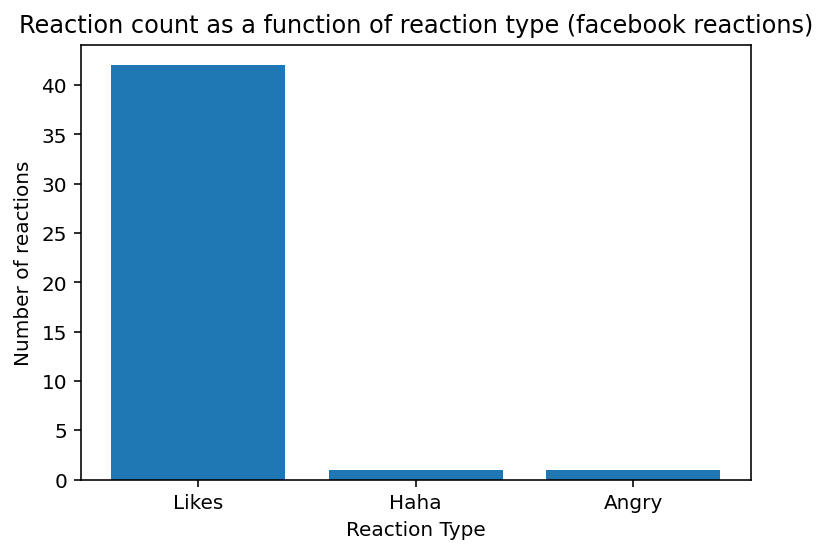

In [11]:
vals = [likes, haha, angry]
inds=range(len(vals))
labels=["Likes", "Haha", "Angry"]

fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.title('Reaction count as a function of reaction type (facebook reactions)')
plt.xlabel('Reaction Type')
plt.ylabel('Number of reactions')

In [19]:
from csv import reader

outfile = open("KFCReviews1.txt", "w")
with open('KFCReviews.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        review = (row['Review'])
        print (review)
        line = "{}\n".format(review)
        outfile.write(review)

Absolutely terrible service never get anything you order food quality isn’t the best unfriendly staff wouldn’t recommend this place
What a terrible store in Layton Utah. Ordered a meal on the KFC Website for delivery. Order arrived and left by door dash. Upon inspection I was missing an entire bucket of chicken! When I called the store they said they couldn't do much with online orders and sent me to a 800# where I was on hold for 13 minutes for a partial refund. What a joke.
I love working at KFC. Great employees and great customers. It’s a great place to work
the kfc in Winchester va on fox drive is the worst place I have ever tried to get food from. every time I go there they never have any food available and the workers have horrible customer service. I made an online order. I went and tried to pick up my order. they specifically said we don't have your order available cause we don't have any chicken in stock. and then the manager refuse to refund my money when they didn't even hav

In [20]:
KFC = open ("KFCReviews1.txt")

In [21]:
KFC_text = KFC.read()

In [22]:
KFC_text

"Absolutely terrible service never get anything you order food quality isn’t the best unfriendly staff wouldn’t recommend this placeWhat a terrible store in Layton Utah. Ordered a meal on the KFC Website for delivery. Order arrived and left by door dash. Upon inspection I was missing an entire bucket of chicken! When I called the store they said they couldn't do much with online orders and sent me to a 800# where I was on hold for 13 minutes for a partial refund. What a joke.I love working at KFC. Great employees and great customers. It’s a great place to workthe kfc in Winchester va on fox drive is the worst place I have ever tried to get food from. every time I go there they never have any food available and the workers have horrible customer service. I made an online order. I went and tried to pick up my order. they specifically said we don't have your order available cause we don't have any chicken in stock. and then the manager refuse to refund my money when they didn't even have 

In [23]:
KFC_token = nltk.word_tokenize(KFC_text)
KFC_token

['Absolutely',
 'terrible',
 'service',
 'never',
 'get',
 'anything',
 'you',
 'order',
 'food',
 'quality',
 'isn',
 '’',
 't',
 'the',
 'best',
 'unfriendly',
 'staff',
 'wouldn',
 '’',
 't',
 'recommend',
 'this',
 'placeWhat',
 'a',
 'terrible',
 'store',
 'in',
 'Layton',
 'Utah',
 '.',
 'Ordered',
 'a',
 'meal',
 'on',
 'the',
 'KFC',
 'Website',
 'for',
 'delivery',
 '.',
 'Order',
 'arrived',
 'and',
 'left',
 'by',
 'door',
 'dash',
 '.',
 'Upon',
 'inspection',
 'I',
 'was',
 'missing',
 'an',
 'entire',
 'bucket',
 'of',
 'chicken',
 '!',
 'When',
 'I',
 'called',
 'the',
 'store',
 'they',
 'said',
 'they',
 'could',
 "n't",
 'do',
 'much',
 'with',
 'online',
 'orders',
 'and',
 'sent',
 'me',
 'to',
 'a',
 '800',
 '#',
 'where',
 'I',
 'was',
 'on',
 'hold',
 'for',
 '13',
 'minutes',
 'for',
 'a',
 'partial',
 'refund',
 '.',
 'What',
 'a',
 'joke.I',
 'love',
 'working',
 'at',
 'KFC',
 '.',
 'Great',
 'employees',
 'and',
 'great',
 'customers',
 '.',
 'It',
 '’',
 's

In [24]:
nltk.FreqDist(KFC_token)

FreqDist({'.': 95, 'the': 89, 'I': 72, 'and': 69, 'to': 59, 'a': 36, 'was': 33, 'in': 31, '!': 30, 'my': 30, ...})

In [26]:
norm = [word.lower() for word in KFC_token if word.isalpha()]
norm

['absolutely',
 'terrible',
 'service',
 'never',
 'get',
 'anything',
 'you',
 'order',
 'food',
 'quality',
 'isn',
 't',
 'the',
 'best',
 'unfriendly',
 'staff',
 'wouldn',
 't',
 'recommend',
 'this',
 'placewhat',
 'a',
 'terrible',
 'store',
 'in',
 'layton',
 'utah',
 'ordered',
 'a',
 'meal',
 'on',
 'the',
 'kfc',
 'website',
 'for',
 'delivery',
 'order',
 'arrived',
 'and',
 'left',
 'by',
 'door',
 'dash',
 'upon',
 'inspection',
 'i',
 'was',
 'missing',
 'an',
 'entire',
 'bucket',
 'of',
 'chicken',
 'when',
 'i',
 'called',
 'the',
 'store',
 'they',
 'said',
 'they',
 'could',
 'do',
 'much',
 'with',
 'online',
 'orders',
 'and',
 'sent',
 'me',
 'to',
 'a',
 'where',
 'i',
 'was',
 'on',
 'hold',
 'for',
 'minutes',
 'for',
 'a',
 'partial',
 'refund',
 'what',
 'a',
 'love',
 'working',
 'at',
 'kfc',
 'great',
 'employees',
 'and',
 'great',
 'customers',
 'it',
 's',
 'a',
 'great',
 'place',
 'to',
 'workthe',
 'kfc',
 'in',
 'winchester',
 'va',
 'on',
 'fox',


In [27]:
wnlem = nltk.WordNetLemmatizer()

In [36]:
filtered_words = [word for word in norm if word not in stop_words]
filtered_words

['absolutely',
 'terrible',
 'service',
 'never',
 'get',
 'anything',
 'order',
 'food',
 'quality',
 'best',
 'unfriendly',
 'staff',
 'recommend',
 'placewhat',
 'terrible',
 'store',
 'layton',
 'utah',
 'ordered',
 'meal',
 'kfc',
 'website',
 'delivery',
 'order',
 'arrived',
 'left',
 'door',
 'dash',
 'upon',
 'inspection',
 'missing',
 'entire',
 'bucket',
 'chicken',
 'called',
 'store',
 'said',
 'could',
 'much',
 'online',
 'orders',
 'sent',
 'hold',
 'minutes',
 'partial',
 'refund',
 'love',
 'working',
 'kfc',
 'great',
 'employees',
 'great',
 'customers',
 'great',
 'place',
 'workthe',
 'kfc',
 'winchester',
 'va',
 'fox',
 'drive',
 'worst',
 'place',
 'ever',
 'tried',
 'get',
 'food',
 'every',
 'time',
 'go',
 'never',
 'food',
 'available',
 'workers',
 'horrible',
 'customer',
 'service',
 'made',
 'online',
 'order',
 'went',
 'tried',
 'pick',
 'order',
 'specifically',
 'said',
 'order',
 'available',
 'cause',
 'chicken',
 'stock',
 'manager',
 'refuse',
 

In [47]:
for word in filtered_words:
    fw_lem = (wnlem.lemmatize(word))
    print(fw_lem)

absolutely
terrible
service
never
get
anything
order
food
quality
best
unfriendly
staff
recommend
placewhat
terrible
store
layton
utah
ordered
meal
kfc
website
delivery
order
arrived
left
door
dash
upon
inspection
missing
entire
bucket
chicken
called
store
said
could
much
online
order
sent
hold
minute
partial
refund
love
working
kfc
great
employee
great
customer
great
place
workthe
kfc
winchester
va
fox
drive
worst
place
ever
tried
get
food
every
time
go
never
food
available
worker
horrible
customer
service
made
online
order
went
tried
pick
order
specifically
said
order
available
cause
chicken
stock
manager
refuse
refund
money
even
food
app
terrible
customer
service
money
provide
decent
meal
called
number
answer
waiting
get
sent
voice
mail
great
customer
service
trashy
kfc
ever
visited
look
picture
chicken
clearly
burned
answer
phone
please
drive
pas
kfc
reel
viral
kfc
trending
tiktoknasty
cold
burnt
chicken
employee
cant
count
slaw
hair
potato
runny
customer
service
care
shame
favorit

In [49]:
fw_fd = nltk.FreqDist(fw_lem)
fw_fd

FreqDist({'e': 2, 's': 1})

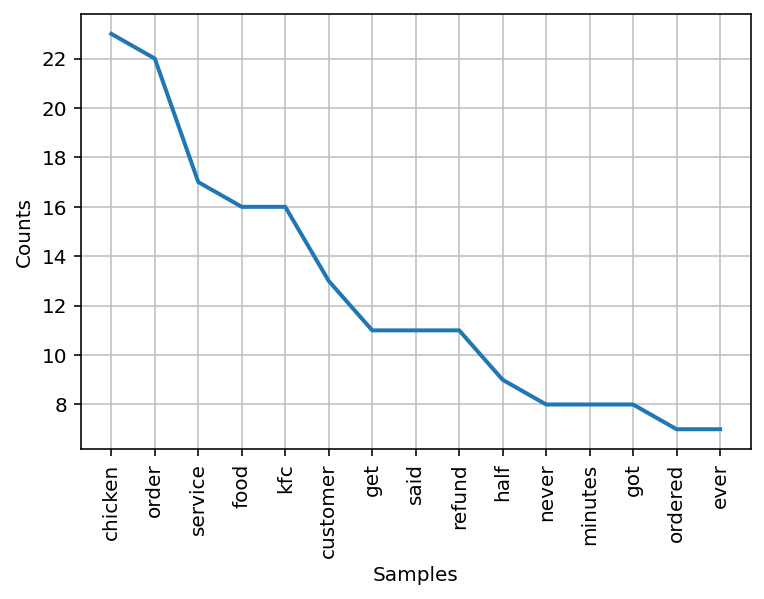

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [46]:
fw_fd.plot(15, cumulative=False)